# PPMROB - Laborübung
Dr. Dietmar Schreiner

---

# Deep Convolutional Neural Networks in pyTorch

## Zielsetzung

In dieser Laborübung wird ein __Image Classification__ Network für den Fashion-MNIST (NIST = National Institute of Standards and Technology; M = modified) Datenbestand entwickelt, trainiert und evaluiert.

### Fashion-MNIST

Der Fashion-MNIST Datenbestand hat sich aus dem MNIST Datenbestand entwickelt, welcher eine Sammlung von 70.000 handgeschriebenen Ziffern ist. Der MNIST Benchmark ist allerdings überaltet und stellt für moderne Methoden keine interessante Herausforderung mehr dar.

<img src="img/mnist_example.png" alt="MNIST" style="height: 200px;"/> 

Im Lauf der Zeit wurden zahlreiche neue Aufgabenstellungen und Datenbestände entwickelt, publiziert und auch weltweit akzeptiert. Einer davon ist der sogenannte Fashion-MNIST Datenbestand. ([Zalando Research](https://github.com/zalandoresearch/fashion-mnist))

Wie der ursprpngliche MNIST Datenbestand enthält auch der Fashion-MNIST Datenbestand 70.000 Bilder, die nun aber keine Ziffern sondern Produkte aus dem Sortiment von Zalando enthalten. Für den Benchmark werden die Bilder gleich dem MNIST Benchmark im Verhältnis 6:1 zwischen Training und Test aufgeteilt.

<td> <img src="img/fmnist.png" alt="Fashion-MNIST" style="height: 200px;"/> </td>

#### Klassen (Labels)

Der Fashion-MNIST Datenbestand ist in 10 Klassen eingeteilt.

Index | Klasse/Label
:---|:---
0 | T-Shirt/Top
1 | Hose
2 | Pullover
3 | Kleid
4 | Mantel/Jacke
5 | Sandale
6 | Hemd
7 | Turnschuh
8 | Tasche/Beutel
9 | Stiefelette

#### Bildformat

* Jedes Bild entspricht der Auflösung __28 x 28__ und umfasst 748 Pixel.
* Jedes Pixel wird durch ein Byte repräsentiert, das den Dunkelheitswert des Bildpunkts speichert (je dunkler, je höher der Wert). 

#### Datenformat

* Jede Zeile im Datenbestand repräsentiert ein Bild.
* Spalte 0 enthält das Label.
* Die Spalten 1 bis 748 enthalten das Bild (Dunkelheitswerte).


## Vorgehensweise

Im Bereich Machine Learning sieht die typische Vorgehensweise wie folgt aus:

* Vorbereiten der Daten
* Entwickeln des Modells
* Trainieren des Modells
* Analyse und Evaluation der Ergebnisse


### Vorbereitung der Daten

(Lern)Daten sind ein elementarer Baustein für die Leistungsfähigkeit eines Neuronalen Netzes. Die Vorbereitung bzw. die Aufbereitung der Daten spielt daher eine sehr wichtige Rolle. 

**Anmerkung: Datenherkunft**

Da die zum Lernen benutzten Daten das Endergebnis des Lernprozesses definieren sind folgende Fragen von esentieller Wichtigkeit:

- Wer hat den Datenbestand erzeugt?
- Wie wurde der Datenbestand erzeugt?
- Wurden die Daten einer Transformation unterzogen?
- Mit welchem Ziel wurde der Datenbestand erstellt?
- Ist der Datenbestand möglicherweise unausgewogen?

#### ETL Prozess

Der ETL Prozess zur Bereitstellung der Daten unterteilt sich in drei Schritte:

* **E**xtract: Extrahieren der Daten aus einer Datenquelle
* **T**ransform: Transformation der Daten in das gewünschte (eigene) Format
* **L**oad: Laden der Daten in passende Datenstrukturen zur weiteren Analyse/Verarbeitung

Für dieser Laborübung wird auf die vorhandenen Ressourcen des __torchvision__ Pakets zurückgegriffen. Diese sind:

* __Datasets__ (z.B. MNIST, Fashion-MNIST)
* __Models__ (z.B. vgg16)
* Transforms
* Utils

__Aufgabe:__ Analyse des MNIST Packages, bzw. der Implementierung von Fashion-MNIST in ___torchvision___.
>__Tip__: miniconda3 -> envs -> ppmrob -> Lib -> site-packages -> torchvision)



##### Exctract & Transform

Im ersten Schritt werden die Fashion-MNIST Bilddaten von der Datenquelle extrahiert. Im zweiten Schritt werden die Bilddaten in einen pyTorch Tensor übertragen. 

In pyTorch steht dazu die Klassen ___Dataset___ (abstrakte Klasse) zur Verfügung. Eine Kindklasse der abstrakten __Dataset__ Klasse muss zwingend eine Implementierung der Methoden __\_\_getitem()\_\___ und __\_\_len()\_\___ enthalten.

```python
class MyDataset(Dataset):
    ...
    def __getitem__(self, index):
        ...
        return sample, label
    def __len__(self):
        ...
        return lenOfMyDataset
    ...
```

Die vom ___torchvision___ Paket bereitgestellte Implementierung für den Fashion-MNIST Datenbestand erledigt Extraktion und Transformation innerhalb des Konstruktors der Fashion-MNIST Klasse.



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# for reference purpose
print(torch.__version__)
print(torchvision.__version__)

2.5.1
0.20.1


In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data', # target directory for dataset
    train = True, # select partition from which the data is taken from
    download = True, # download if data does not exist
    transform = transforms.Compose([transforms.ToTensor()]) # transform raw image data to tensow
)

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



__Aufgabe:__ Analyse des Fashion-MNIST Datenbestandes.

##### Load

Im dritten Schritt werden die Daten in ein Objekt verpackt, das den Datenzugriff und die Verwendung der Daten erleichtert. In pyTorch steht dazu die Klasse ___DataLoader___ zur Verfügung.


In [4]:
train_loader = torch.utils.data.DataLoader(
    train_set, # dataset to operate on
    batch_size=10 # batch size for the DL operation, default is 1
)        

##### Arbeiten mit den Daten

In [5]:
import numpy as np
import matplotlib.pyplot as plt # conda install -c conda-forge matplotlib

torch.set_printoptions(linewidth=120)

###### Allgemeine Struktur des Datenbestands

In [6]:
len(train_set) # size of dataset

60000

In [7]:
train_set.targets # labels of all images within the dataset

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
train_set.targets.bincount() # frequency distribution of labels within tensor

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

Da alle Bins gleich viele Elemente anthalten wird dieser Datenbestand als ausgewogen (_balanced_) bezeichnet. Stehen die Ausgangsdaten nur unausgewogen (_unbalanced_) zur Verfügung ist es i.d.R. sinnvoll die Ausgewogenheit herzustellen, indem Elemente in unterrepräsentierten Klassen dupliziert werden (___Oversampling___).

###### Datenzugriff

In [9]:
sample = next(iter(train_set)) # get next single sample from stream of iterable objects

In [10]:
len(sample)

2

In [11]:
type(sample)

tuple

In [12]:
image, label = sample # get image and lable via python's sequence unpacking mechanism

In [13]:
image.shape # examine shape of image tensor

torch.Size([1, 28, 28])

label: 9


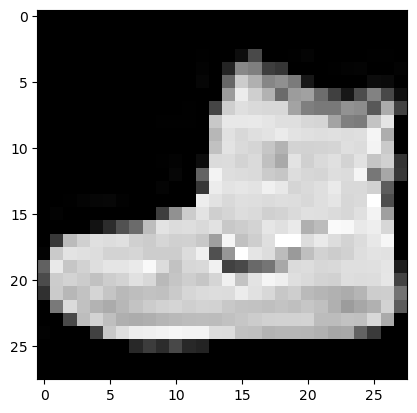

In [14]:
plt.imshow(image.squeeze(),cmap='gray')
print('label:', label)

In [15]:
type(sample[1])

int

###### Batches

Batches sind eine Zudammenfassung von mehreren (_n_) Bildern, also ein Tensor aus _n_ Bild-Tensoren.

In [16]:
batch = next(iter(train_loader)) # get batch from train_loader (not train_data!)

In [17]:
len(batch)

2

In [18]:
type(batch)

list

In [19]:
type(batch[0])

torch.Tensor

In [20]:
type(batch[1])

torch.Tensor

In [21]:
images, labels = batch

In [22]:
images.shape

torch.Size([10, 1, 28, 28])

In [23]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


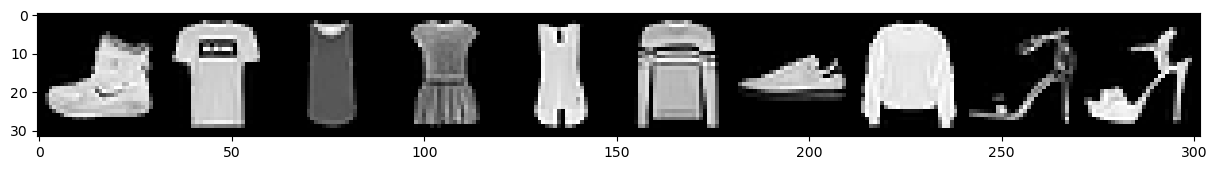

In [24]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15)) # figure size 15x15
plt.imshow(np.transpose(grid,(1,2,0)))

print('labels:', labels)

### Entwickeln des Modells

Mit dem Begriff Modell (model) wird _das Neuronale Netzwerk selbst_, dessen Architektur, Parameter (learnable) und Hyperparameter, bezeichnet.

Um ein Model zu entwickeln wird von PyTorch im Package ___torch.nn___ umfangreiche Funktionalität zur Verfügung gestellt, die dem OO-Paradigma folgt. Die Basisklasse für alle Neuronalen Netzwerke, wie auch für alle Module (Schichten mit trainierbaren Parametern) eines Neuronalen Netzes ist die Klasse ___Module___. Diese ist unter anderem zuständig für das Registrieren der trainierbaren Gewichte (Parameter) der Module.

Die Implementierung eines Neuronalen Netzes in PyTorch efolgt in folgenden Schritten:

* Erweitern der Basisklasse ___torch.nn.Module___
* Hinzufügen der Layer in Form von Klassenattributen
* Implementierung des Forward Passes des Neuronalen Netzes in der Methode ___forward()___

#### Erweiterung der Basisklasse & Hinzufügen der Layer

Um ein Neuronales Netz zu spezifizieren muss dessen Klasse von ___torch.nn.Module___ erben. Im  Konstruktor werden alle Layer des Neuronalen Netzes als Klassenattribute hinzugefügt. Die Layer selbst sind wieder Kinder der Basisklasse ___torch.nn.Module___.

```python
import torch.nn as nn

class MyModel(nn.Module):
    ...
    def __init__(self):
        super().__init__()
        # define architecture here
        # ...
    ...
```

In PyTorch sind einige häufig benötigte Typen von Layer bereits vorimplementiert. Diese sind z.B.:

* Linear Layers
* Convolutional Layers
* Reccurent Layers
* Transformers
* Data Manipulation Layers
    * Max pooling Layers
    * Normalization Layers
    * Dropout Layers

#### Forward Pass

Der Datenfluss durch das Neuronale Netz wird in der Implementierung der Funktion ___forward()___ konkretisiert. Dabei wird mittels Fuktionskomposition der einzelnen Layer und Funktionale eine zusammengesetzte "Gesamtfunktion" des Moduls/NNs realsiert. 
PyTorch stellt im Paket ___torch.nn.functional___ zusätzlich für Neuronale Netze typische Funktionen, wie z.B. ___ReLU___ oder ___SoftMax___ zur Verfügung.

```python
import torch.nn as nn

class MyModel(nn.Module):
    ...
    def forward(self, t):
        # implement forward pass for the NN here
        # the overall forward pass is simply a function concatenation
        # ...
        return t
    ...   
```

Die Funktion ___forward()___ wird in PyTorch vom Funktor der Klasse (**\_\_call()\_\_**) aufgerufen, wenn eine Forward Propagation berechnet werden soll.

```python
# instantiate my neural network
my_model = MyModel()

# now feed in an input_tensor for the network's forward pass
my_model(input_tensor)
```



#### Beispiel für ein einfaches Neuronales Netz

Beispielhaft soll folgendes Neuronales Netz mit 100 Input-Neuronen implementiert werden, das ein Hidden-Layer mit 200 Neuronen und ein Output-Layer mit 10 Neuronen besitzt. Alle Layer sind _dense_.

<img src="img/nn_example.png" alt="MNIST" style="height: 350px;" align="left"/> 


In [25]:
import torch.nn as nn
import torch.nn.functional as fn

In [26]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear(100, 200) # Hyper parameters, manually chosen
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(200, 10) # Hyper parameters, manually chosen
        self.softmax = nn.Softmax()
        
    def forward(self, t):
        t = self.linear1(t)
        t = self.activation(t)
        t = self.linear2(t)
        t = self.softmax(t)
        return(t)
    
my_model = MyModel()

In [27]:
# show my_model
my_model

MyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

In [28]:
# show specific layer of my_model
my_model.linear2

Linear(in_features=200, out_features=10, bias=True)

In [29]:
# show type of specific layer of my_model
for base in my_model.linear1.__class__.__bases__:
    print(base.__name__)

Module


In [30]:
# show my_model parameters
for param in my_model.parameters():
    print(param)
    print(param.shape)

Parameter containing:
tensor([[ 0.0541,  0.0655, -0.0947,  ..., -0.0951,  0.0818, -0.0269],
        [ 0.0130, -0.0717, -0.0305,  ..., -0.0404,  0.0701,  0.0429],
        [-0.0484, -0.0881, -0.0626,  ..., -0.0766,  0.0164,  0.0086],
        ...,
        [ 0.0486, -0.0291,  0.0901,  ..., -0.0126,  0.0192, -0.0082],
        [-0.0484, -0.0788, -0.0680,  ..., -0.0135,  0.0201,  0.0292],
        [-0.0017,  0.0644,  0.0404,  ..., -0.0825, -0.0227, -0.0434]], requires_grad=True)
torch.Size([200, 100])
Parameter containing:
tensor([ 0.0058, -0.0441,  0.0486, -0.0342, -0.0045,  0.0686, -0.0941, -0.0052,  0.0296, -0.0353,  0.0634, -0.0058,
        -0.0053, -0.0214,  0.0624, -0.0095, -0.0180, -0.0516, -0.0084,  0.0084, -0.0377, -0.0945,  0.0243, -0.0251,
         0.0443,  0.0631, -0.0233, -0.0930,  0.0145, -0.0082,  0.0746,  0.0669,  0.0121, -0.0641, -0.0097, -0.0609,
         0.0601,  0.0283, -0.0511,  0.0832, -0.0314,  0.0898, -0.0924, -0.0645, -0.0095, -0.0990, -0.0853, -0.0889,
         0.0034

In [31]:
# show parameters of specific layer of my_model
for param in my_model.linear1.parameters():
    print(param)
    print(param.shape)

Parameter containing:
tensor([[ 0.0541,  0.0655, -0.0947,  ..., -0.0951,  0.0818, -0.0269],
        [ 0.0130, -0.0717, -0.0305,  ..., -0.0404,  0.0701,  0.0429],
        [-0.0484, -0.0881, -0.0626,  ..., -0.0766,  0.0164,  0.0086],
        ...,
        [ 0.0486, -0.0291,  0.0901,  ..., -0.0126,  0.0192, -0.0082],
        [-0.0484, -0.0788, -0.0680,  ..., -0.0135,  0.0201,  0.0292],
        [-0.0017,  0.0644,  0.0404,  ..., -0.0825, -0.0227, -0.0434]], requires_grad=True)
torch.Size([200, 100])
Parameter containing:
tensor([ 0.0058, -0.0441,  0.0486, -0.0342, -0.0045,  0.0686, -0.0941, -0.0052,  0.0296, -0.0353,  0.0634, -0.0058,
        -0.0053, -0.0214,  0.0624, -0.0095, -0.0180, -0.0516, -0.0084,  0.0084, -0.0377, -0.0945,  0.0243, -0.0251,
         0.0443,  0.0631, -0.0233, -0.0930,  0.0145, -0.0082,  0.0746,  0.0669,  0.0121, -0.0641, -0.0097, -0.0609,
         0.0601,  0.0283, -0.0511,  0.0832, -0.0314,  0.0898, -0.0924, -0.0645, -0.0095, -0.0990, -0.0853, -0.0889,
         0.0034

In [32]:
# show learnable parameters of my_network
for name, param in my_model.named_parameters():
    print(name, '\t\t', param.shape)

linear1.weight 		 torch.Size([200, 100])
linear1.bias 		 torch.Size([200])
linear2.weight 		 torch.Size([10, 200])
linear2.bias 		 torch.Size([10])


In [33]:
# show learnable parameters (weights) of specific layer
print(my_model.linear1.weight)
print(my_model.linear1.weight.shape)

Parameter containing:
tensor([[ 0.0541,  0.0655, -0.0947,  ..., -0.0951,  0.0818, -0.0269],
        [ 0.0130, -0.0717, -0.0305,  ..., -0.0404,  0.0701,  0.0429],
        [-0.0484, -0.0881, -0.0626,  ..., -0.0766,  0.0164,  0.0086],
        ...,
        [ 0.0486, -0.0291,  0.0901,  ..., -0.0126,  0.0192, -0.0082],
        [-0.0484, -0.0788, -0.0680,  ..., -0.0135,  0.0201,  0.0292],
        [-0.0017,  0.0644,  0.0404,  ..., -0.0825, -0.0227, -0.0434]], requires_grad=True)
torch.Size([200, 100])


#### Funktionsweise eines Layers am Beispiel Linear Layer

Um die Funktionsweise des PyTorch Linear Layers zu untersuchen wird eine lineare Transformation zuerst händisch implementiert:

In [34]:
# define input tensor
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

# define weight tensor
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

# multiply them
weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

Nun wird die selbe Funktionalität in Form eines PyTorch Linear Layers realisiert:

In [35]:
# define a linear layer of desired shape
linear = nn.Linear(in_features=4, out_features=3)

# apply input tensor 
linear(in_features) # this invoces forward(...) via __call__(...)

tensor([ 0.4696,  1.0876, -0.3592], grad_fn=<ViewBackward0>)

Das Ergebins ist allerdings nicht das gewünschte, da PyTorch beim Erzeugen eines Layers die Gewichte standardmäßig mit Zufallswerten initialisiert.

In [36]:
print(linear.weight)

Parameter containing:
tensor([[ 0.1454,  0.3774, -0.3319,  0.2269],
        [ 0.0266, -0.0033,  0.1236,  0.2393],
        [ 0.1380, -0.4898,  0.1998, -0.1169]], requires_grad=True)


Um die oben händisch implementierte lineare Transformation richtigzustellen muss daher der"zufällige" Gewichtstensor mit der korrekten _weight_matrix_ ersetzt werden.

In [37]:
# set weight tensor to the desired one
linear.weight = nn.Parameter(weight_matrix)

# apply input tensor 
linear(in_features)

tensor([29.6574, 39.7395, 50.3505], grad_fn=<ViewBackward0>)

Auch dieses Ergebnis ist nicht korrekt, auch wenn sich bereits eine gewisse Ähnlichkeit zum Soll-Wert zeigt. Der Grund hierfür ist der Bias, der in PyTorch für ein Linear Layer standardmäßig aktiviert ist.

In [38]:
# deactivate bias
linear.bias=None # better provide argument False for parameter bias when constructing a linear layer

# apply input tensor 
linear(in_features)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward4>)

Zusammenfassend kann ein PyTorch Linear Layer formal beschrieben werden durch $y=Ax+b$ wobei

| Variable | Bedeutung |
|:---|:--- |
| $A$ | Gewichte (Tensor) |
| $x$ | Input Tensor |
| $b$ | Bias Tensor |
| $y$ | Output Tensor |


#### Convolutional Neuronal Network für Fashion-MNIST

##### Modell

Für die Klassifikation eines Bildes aus dem Fashion-MNIST Datenbestandes kann ein einfaches Convolutional Neural Network verwendet werden. Die Architektur (das Model) des Netzes entspricht nachfolgender Abbildung:

<img src="img/fmnist_network.jpg" alt="MNIST" style="height: 300px;" align="left"/> 

Das Modell besteht aus 2 **Convolution Layer**, beider mit quadratischen Filtern der Größe _5x5_ und **Max Pooling** der Form _2x2_ sowie 3 **Fully Connected Layer** (Dense Layer).

In [39]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # in: 1x image (28x28), out: 6 channels (12x12)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # in: 6x feature map (12x12), out: 12 channels (4x4)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120) # in: 12x feature map (4x4) flattened, out: 120, dense
        self.fc2 = nn.Linear(in_features=120, out_features=60) # in: 120 out: 60, dense 
        self.out = nn.Linear(in_features=60, out_features=10) # in: 60, out: 10 output classes
        
    def forward(self,t):
        # (1) input layer (identity...)
        t = t
        
        # (2) hidden convolution layer 1
        t = self.conv1(t)
        t = fn.relu(t)
        t = fn.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden convolution layer 2
        t = self.conv2(t)
        t = fn.relu(t)
        t = fn.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer 1
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = fn.relu(t)

        # (5) hidden linear layer 2
        t = self.fc2(t)
        t = fn.relu(t)
        
        # (6) output layer
        t = self.out(t)
        
        # this is not used in this example, as for learning we will use x-entropy (which does softmax by itself)
        # t = fn.softmax(t, dim=1)

        return(t)

Zur Berechnung der ___Output___ Hyperparameter kann für quadratische Bilder und Filter folgende Formel herangezogen werden:

\begin{align}
O = \dfrac{n-f+2p}{s}+1
\end{align}

| Variable | Bedeutung |
|:---|:---|
| $n$ | Breite und Höhe des Bildes |
| $f$ | Breite und Höhe des Filters |
| $p$ | Padding |
| $s$ | Stride |

Allgemein (nicht-quadratisch) gilt:

\begin{align}
O_h = \dfrac{n_h-f_h+2p}{s}+1
\end{align}

\begin{align}
O_w = \dfrac{n_w-f_w+2p}{s}+1
\end{align}

| Variable | Bedeutung |
|:---|:---|
| $n_w$ | Breite des Bildes |
| $n_h$ | Höhe des Bildes |
| $f_w$ | Breite des Filters |
| $f_h$ | Höhe des Filters |
| $p$ | Padding |
| $s$ | Stride |

### Inferenz (Forward Pass) 


Um am Ausgang dieses Netzwerks eine Aussage/Prognose zu einem bestimmten Bild zu erhalten, muß das Bild (eigentlich der Bildtensor) vorwärts durch das Netz propagiert werden. Dieser Vorgang wird als ___Inferenz___ bezeichnet.

**Hinweis**: Zum Zeitpunkt der Inferenz ist das maschinelle Lernen des Neuronalen Netzes bereits abgeschlossen. Die in PyTorch dynamische Berechnung der Gradienten der Fehlerfunktion (benötigt für den Lernvorgang) des Netzwerks bei der Vorwärtspropagation eines Tensors wird daher nicht benötigt und sollte deaktiviert werden.

In [40]:
# deactivate dynamic gradient calculation
torch.set_grad_enabled(False)

In [41]:
# instantiate the Fashion-MNIST network
network = Network()

In [42]:
# show the model
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

#### Inferenz für ein einzelnes Bild

In [43]:
# get a sample image
sample = next(iter(train_set))
image, label = sample

In [44]:
image.shape

torch.Size([1, 28, 28])

PyTorch erwartet als Input für Neuronale Netze nicht ein einzelnen Bild sondern einen Batch. 
> ___(batch_size, in_channels, height, width)___

Dieser kann natürlich auch nur aus einem Bild bestehen.

In [45]:
# create a batch containing exactly one image by add one dimension
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [46]:
# run inference
pred = network(image.unsqueeze(0))

In [47]:
pred.shape

torch.Size([1, 10])

In [48]:
pred # outout tensor (raw)

tensor([[-0.0298,  0.0815,  0.1428,  0.1041, -0.0455,  0.0031, -0.0162, -0.1328, -0.0121,  0.0811]])

In [49]:
pred.argmax(dim=1) # the index of the "best" (max) argument

tensor([2])

In [50]:
fn.softmax(pred, dim=1) # probability for each class

tensor([[0.0951, 0.1063, 0.1130, 0.1087, 0.0936, 0.0983, 0.0964, 0.0858, 0.0968, 0.1062]])

Das Ergebnis ist natürlich unbefriedigend. Dies liegt daran, dass das verwendete Neuronale Netzwerk (noch) nicht trainiert ist.

#### Inferenz für einen Batch

Eines PyTorch Batche ist (wie bereits oben gezeigt) ein Tensor folgender ausprägung:
> ___(batch_size, in_channels, height, width)___


In [51]:
# get next batch from data loader
batch = next(iter(train_loader))

# decompose batch
images, labels = batch

In [52]:
images.shape

torch.Size([10, 1, 28, 28])

In [53]:
labels.shape

torch.Size([10])

In [54]:
# run inference
preds = network(images)

In [55]:
# output tensor (raw)
preds.shape

torch.Size([10, 10])

In [56]:
preds

tensor([[-0.0298,  0.0815,  0.1428,  0.1041, -0.0455,  0.0031, -0.0162, -0.1328, -0.0121,  0.0811],
        [-0.0312,  0.0834,  0.1419,  0.1161, -0.0365,  0.0159, -0.0175, -0.1270, -0.0152,  0.0834],
        [-0.0262,  0.0828,  0.1462,  0.0940, -0.0429,  0.0029, -0.0258, -0.1202, -0.0116,  0.0793],
        [-0.0267,  0.0814,  0.1475,  0.0991, -0.0435,  0.0082, -0.0207, -0.1228, -0.0111,  0.0824],
        [-0.0254,  0.0877,  0.1441,  0.1083, -0.0409,  0.0085, -0.0169, -0.1315, -0.0128,  0.0838],
        [-0.0295,  0.0875,  0.1391,  0.1129, -0.0382,  0.0106, -0.0157, -0.1302, -0.0112,  0.0836],
        [-0.0272,  0.0772,  0.1444,  0.0999, -0.0429,  0.0079, -0.0218, -0.1290, -0.0146,  0.0788],
        [-0.0306,  0.0843,  0.1379,  0.1225, -0.0419,  0.0151, -0.0105, -0.1330, -0.0093,  0.0855],
        [-0.0288,  0.0792,  0.1419,  0.0991, -0.0452,  0.0061, -0.0260, -0.1181, -0.0143,  0.0828],
        [-0.0278,  0.0855,  0.1406,  0.1029, -0.0435,  0.0017, -0.0245, -0.1208, -0.0182,  0.0796]])

In [57]:
# most likely class for each image
preds.argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
# ground truth
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [59]:
# comparison of result to ground truth
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False,  True, False,  True, False, False])

In [60]:
def num_of_correct_preds(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [61]:
num_of_correct_preds(preds, labels)

2

### Trainieren des Modells

Der Vorgang des maschinellen Lernens in einem Neuronalen Netzes umfasst folgende Schritte:

1. Batch von Trainingsdaten (aus der Menge der Trainingsdaten) vorbereiten
2. Vorwärtspropagation des Batches durch das Neuronale Netz
3. Berechnung des Fehlers (loss)
4. Berechnung der Gradienten der Fehlerfunktion unter Berücksichtigung der Gewichte
5. Aktualisieren der Gewichte unter Zuhilfenahme der Gradienten

Diese Schritte werden für eine gesamte **Epoche** wiederholt. Unter eine Epoche versteht man die Gesamtmenge der Trainingsdaten.

Solange die Güte (Genauigkeit) des Netzwerks nicht der gewünschten entspricht wiederhole den gesamten Vorgang für weitere Epochen. 

**Anmerkung**: Sollte ein Modell auch nach umfangreichem wiederholten Training die geforderte Güte klar nicht erreichen, kann es sinnvoll sein, den Trainingsvorgang abzubrechen und das Modell zu überarbeiten. 

In [62]:
# do some house keeping
torch.set_grad_enabled(True) # should be on by default, but maybe has been turned off above

#### Vorbereitung eines Batches

In [63]:
# create a new train_loader with batch size of 100
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

# get a batch of training data
batch = next(iter(train_loader))

images, labels = batch

#### Vorwärtspropagation des Batches

In [64]:
# calculate predictions for the batch
preds = network(images)

#### Beechnung des Fehlers

In [65]:
# calculate loss for the batch
loss = fn.cross_entropy(preds, labels)
loss.item()

2.296710252761841

Die Interpretation dieses Wertes hängt von der gewählten Fehlerfunktion ab. Mit voranschreitendem Training des Netzes sollte sich der Wert verringern.

#### Berechnung der Gradienten

Vor dem ersten Aufruf der Back-Propagation Funktion existieren (noch) keine Gradienten.

In [66]:
# prior to the first call of backward() no gradients exist
print(network.conv1.weight.grad)

None


In [67]:
# calculate gradients
loss.backward()

Nach Durchführung der Back-Propergation stehen berechnete Gradienten zur Verfügung. Für jeden Tensor mit Gewichten wird ein korrespondierender Tensor mit den Gradienten der Gewichte erzeugt.

In [68]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

#### Aktualisieren der Gewichte

Um die Gewichte des Neuronalen Netzes neu einzustellen, was eben der Lernvorgang ist, werden diese mittels eines sogenannten ___Optimizers___ aktualisiert. Gängige Optimizer sind:

* **Stochastic Gradient Decent (SGD)**: Die Gewichtsänderung entspricht dem Produkt aus Lernrate und Gradient.
* **Root Mean Square Propagation (RMSProp)**: Die Gewichtsänderung hängt von einem exponentiell gleitenden Durchschnitt vorherigen Gradienten und einer daraus abgeleiteten Lernrate ab.
* **Adaptive Moment Estimation (ADAM)**: Dieser Optimizer kombiniert RMSProp mit einem Momentum.

In [69]:
# import optimizer package
import torch.optim as optim

In [70]:
optimizer = optim.Adam(network.parameters(), lr=0.01) # lr is the hyper parameter "learning rate"

##### Training mit einem einzelnen Batch
Vor dem Lernvorgang:

In [71]:
print("Loss: ",loss.item())
print("Correct items:", num_of_correct_preds(preds, labels))

Loss:  2.296710252761841
Correct items: 9


In [72]:
# update the weights
optimizer.step()

Nach dem Lernvorgang:

In [73]:
# get predictions for the same images
preds = network(images)

# calculate new loss
loss = fn.cross_entropy(preds, labels)

print("Loss: ",loss.item())
print("Correct items:", num_of_correct_preds(preds, labels))

Loss:  2.273770570755005
Correct items: 15


In [74]:
# do some house keeping
enumerate(train_loader) # just reset the data loader for further usage

##### Training einer Epoche

Um eine gesamte Epoche zu trainieren muss mit dem ___DataLoader___ über den gesamten datenbestand iteriert werden. Dabei wird jeder Batch wie oben gezeigt abgearbeitet.

**Wichtig**: PyTorch akkumuliert alle Gradienten zwischen aufeinanderfolgenden Aufrufen der ___backward()__ Funktion. Da das für den Lernvorgang nicht gewünscht wird, müssen vor dem Berechnen der Gradienten des Batches alle Werte des vorausgegangenen Batches mittels der Funktion ___zero.grad()___ auf 0 zurückgesetzt werden.

In [75]:
total_loss = 0
total_correct = 0

def do_epoche(epoche_loss, epoche_correct):
    # iterate over all batches
    for batch in train_loader:
    
        images, labels = batch # prepare batch
    
        preds = network(images) # forward pass batch
        loss = fn.cross_entropy(preds, labels) # calculate loss
    
        optimizer.zero_grad() # reset gradient tensors (would be accumulated otherwise)
    
        loss.backward() # calculate gradients
        optimizer.step() # update weights
    
        epoche_loss+=loss.item()
        epoche_correct+=num_of_correct_preds(preds, labels)
    
    return epoche_loss, epoche_correct

total_loss, total_correct = do_epoche(total_loss, total_correct)

print("epoche:", 0, "total correct:", total_correct, "loss:", total_loss)

epoche: 0 total correct: 46738 loss: 346.3468813896179


In [76]:
total_correct / len(train_set)

0.7789666666666667

In [77]:
# do some house keeping
enumerate(train_loader) # reset the data loader for further usage
network = Network() # create a new untrained network
optimizer = optim.Adam(network.parameters(), lr=0.01) # create a new optimizer

##### Training über mehrere Epochen

In [78]:
import time
start_time = time.time()

for epoche in range(5):
    total_loss = 0
    total_correct = 0
    
    total_loss, total_correct = do_epoche(total_loss, total_correct)
    print("epoche:", epoche, "total correct:", total_correct, "loss:", total_loss, "accuracy:", total_correct / len(train_set))

print("time:", time.time() - start_time)

epoche: 0 total correct: 46937 loss: 344.17807663977146 accuracy: 0.7822833333333333
epoche: 1 total correct: 51293 loss: 233.1632865667343 accuracy: 0.8548833333333333
epoche: 2 total correct: 51976 loss: 214.76753947138786 accuracy: 0.8662666666666666
epoche: 3 total correct: 52369 loss: 204.57819442451 accuracy: 0.8728166666666667
epoche: 4 total correct: 52479 loss: 201.42270778119564 accuracy: 0.87465
time: 49.569013833999634


#### Training auf der GPU

PyTorch ermöglicht eine komfortable Nutzung von GPU Ressourcen bei der Verwendung Neuronaler Netze. Source Code kann mit geringen anpassungen sogar Hardware-Agnostisch entwickelt werden.

Bei der Nutzung einer GPU (___CUDA___) ist darauf zu achten, dass alle Operanden (das Neuronale Netz, sowie alle Input Tensoren wie z.B. Batch der Bilder und Labels) auf der GPU instanziert werden.

In [79]:
# use GPU if available, else use the CPU for calculations
if torch.cuda.is_available():
    target_device="cuda"
else:
    target_device="cpu"
    
device=torch.device(target_device)   

In [80]:
device

device(type='cpu')

In [81]:
# create a new neural network and transfer it to the GPU memory
network = Network().to(device) # move NN to GPU

In [82]:
for n, p in network.named_parameters():
    print(p.device, '', n)

cpu  conv1.weight
cpu  conv1.bias
cpu  conv2.weight
cpu  conv2.bias
cpu  fc1.weight
cpu  fc1.bias
cpu  fc2.weight
cpu  fc2.bias
cpu  out.weight
cpu  out.bias


In [83]:
# do some house keeping
enumerate(train_loader) # just reset the data loader for further usage

# create a new optimizer that is based on the GPU memory of the new network
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [84]:
start_time = time.time()

for epoche in range(5):
    total_loss = 0
    total_correct = 0
    
    # iterate over all batches
    for batch in train_loader:
        images = batch[0].to(device)
        labels = batch[1].to(device) 
    
        preds = network(images) # forward pass batch
        loss = fn.cross_entropy(preds, labels) # calculate loss
    
        optimizer.zero_grad() # reset gradient tensors (would be accumulated otherwise)
    
        loss.backward() # calculate gradients
        optimizer.step() # update weights
    
        total_loss+=loss.item()
        total_correct+=num_of_correct_preds(preds, labels)

    print("epoche:", epoche, "total correct:", total_correct, "loss:", total_loss, "accuracy:", total_correct / len(train_set))

print("time:", time.time() - start_time)


epoche: 0 total correct: 47500 loss: 334.7096818983555 accuracy: 0.7916666666666666
epoche: 1 total correct: 51354 loss: 234.99755373597145 accuracy: 0.8559
epoche: 2 total correct: 52020 loss: 215.20365089178085 accuracy: 0.867
epoche: 3 total correct: 52243 loss: 208.2905939221382 accuracy: 0.8707166666666667
epoche: 4 total correct: 52469 loss: 200.67240151762962 accuracy: 0.8744833333333333
time: 56.19753861427307


### Analyse und Evaluation der Ergebnisse

In [85]:
# do some house keeping
enumerate(train_loader) # just reset the data loader for further usage

In [86]:
# reinstantiate Network
network = Network()

# create a new optimizer that is based on the memory of the new network
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [87]:
# train the Network
import time
start_time = time.time()

for epoche in range(5):
    total_loss = 0
    total_correct = 0
    
    total_loss, total_correct = do_epoche(total_loss, total_correct)
    print("epoche:", epoche, "total correct:", total_correct, "loss:", total_loss, "accuracy:", total_correct / len(train_set))

print("time:", time.time() - start_time)

epoche: 0 total correct: 47489 loss: 331.85713474452496 accuracy: 0.7914833333333333
epoche: 1 total correct: 51653 loss: 224.5791050195694 accuracy: 0.8608833333333333
epoche: 2 total correct: 52112 loss: 211.4697917997837 accuracy: 0.8685333333333334
epoche: 3 total correct: 52500 loss: 202.85657006502151 accuracy: 0.875
epoche: 4 total correct: 52889 loss: 192.31287036836147 accuracy: 0.8814833333333333
time: 55.245665311813354


In [88]:
# helper function that feeds all datasets from a dataloader into the neural net and
# returns a tensor with all predictions for the input data set
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
        preds = model(images)
        all_preds = torch.cat((all_preds, preds), dim=0)
    return all_preds

#### Evaluation mit Testdaten

Im Zuge der Datenaufbereitung wurden alle Verfügbaren Daten in Trainings- und Testdaten partitioniert. Der Trainingsprozess ist mit den Trainingsdaten vollzogen worden, für die Evaluierung des trainierten Neuronalen Netzes kommen die Testdaten, die das Neuronale Netz noch nie gesehen hat, zum Einsatz.

In [89]:
test_set = torchvision.datasets.FashionMNIST(
    root = './data', # target directory for dataset
    train = False, # select partition from which the data is taken from
    download = True, # download if data does not exist
    transform = transforms.Compose([transforms.ToTensor()]) # transform raw image data to tensow
)

In [90]:
len(test_set)

10000

In [91]:
test_loader = torch.utils.data.DataLoader(
    test_set, # dataset to operate on
    batch_size=10000 # batch size for the DL operation, default is 1
) 

Da beim Inferieren des Neuronalen Netzes kein Lernvorgang stattfindet, können alle Funktionen der Berechnungsverfolgung für Gradienten deaktiviert werden. Dies kann auch auf lokaler Ebene z.B. mittels eines Context Managers erfolgen:

In [92]:
# calculate predictions
with torch.no_grad(): # context manager deactivates gradient calculation
    test_preds = get_all_preds(network, test_loader)

Eine weitere Möglichkeit die dynamische Berechnung der Gradienten lokal zu deaktivieren ist die Annotation einer Funktion mittels eines Dekorators:

```python
@torch.no_grad()
def get_all_preds(model, loader):
    ...
```

In [93]:
total = len(test_set.targets) # total number of images processed
total_correct = num_of_correct_preds(test_preds, test_set.targets) # number of correct predicitions

print("Network accuracy: ", total_correct/total, " got ", total_correct, " right from ", total )

Network accuracy:  0.8644  got  8644  right from  10000


#### Confusion Matrix

Eine sogenannte ___Confusion Matrix___ ist eine 3-dimensionale Matrix die darüber Auskunft gibt, welche Klassen korrekt erkannt wurden, und bei welchen Klassen Abweichungen in der Vorhersage vorliegen.

Dazu werden auf den zwei orthogonalen Achsen der Grundebene (x,y) jeweils alle Labels (Klassen) aufgetragen, um die Vorhersage des Neuronalen Netzes mit dem tatsächlichen Wert in Relation zu setzen. Die erste Achse (x) repräsentiert die Vorhersagen des Netzwerks und die zweite Achse (y) die tatsächlichen Werte (_ground truth_). In der dritten Dimension (z) wird die Gesamtzahl aller zur jewiligen Paarung aus Vorhersage und tatsächlichem Wert gehörenden Ausgaben (x,y) des Neuronalen Netzes gezählt.

<img src="img/cm.jpg" alt="Confusion Matrix" style="height: 120px;" align="center"/>

In einem perfekt trainierten Netzwerk (_accuracy=100%_) wird nur die erste Hauptdiagonale der Grundebene Werte $\gt 0$ für die z-Achse enthalten, da alle Klassenprognosen exakt mit den tatsächlichen Klassen übereinstimmen. In _echten_ Neuronalen Netzen werden auch abseits der Hauptdiagonale Werte auftreten (eben falsche Prognosen). Mittels der Confusion Matrix wird dadurch deutlich bei welchen Klassen Prognosen scheitern, und vor allem was womit verwechselt wird.

In [94]:
# create data loader based on training data (!)
pred_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)

# calculate predictions
with torch.no_grad(): # context manager deactivates gradient calculation
    train_preds = get_all_preds(network, pred_loader)

In [95]:
train_preds.shape

torch.Size([60000, 10])

In [96]:
train_preds.requires_grad

False

In [97]:
num_of_correct_preds(train_preds, train_set.targets)

52732

##### Berechnung der Confusion Matrix

In [98]:
# labels (ground truth)
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [99]:
# predictions
train_preds.argmax(dim=1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [100]:
# map ground truth to prediction for each prediction
stacked = torch.stack(
    (
        train_set.targets, 
        train_preds.argmax(dim=1)
    ),
    dim=1
)

In [101]:
stacked.shape

torch.Size([60000, 2])

In [102]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [103]:
stacked[0].tolist()

[9, 9]

In [104]:
cmt = torch.zeros(10, 10, dtype=torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [105]:
for p in stacked:
    gt, pred = p.tolist()
    cmt[gt, pred] = cmt[gt, pred] + 1
    
cmt

tensor([[5604,    2,  171,   90,   11,    2,   99,    1,   20,    0],
        [  20, 5866,    7,   80,    6,    4,   12,    0,    5,    0],
        [  51,    2, 5388,   55,  312,    1,  181,    0,   10,    0],
        [ 309,   77,   72, 5409,   92,    0,   39,    0,    1,    1],
        [  17,    8,  709,  352, 4362,    1,  531,    0,   20,    0],
        [   1,    0,    0,    0,    0, 5812,    0,  128,   15,   44],
        [1749,    6,  975,  135,  251,    0, 2861,    0,   23,    0],
        [   0,    0,    0,    0,    0,   43,    0, 5807,    3,  147],
        [  23,    3,   38,   13,   16,    7,   61,    6, 5833,    0],
        [   0,    0,    0,    2,    0,   24,    0,  179,    5, 5790]])

##### Plot der Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix # scikit-learn
from resources.plotcm import plot_confusion_matrix # local include

cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))

In [107]:
type(cm)

numpy.ndarray

In [108]:
cm

array([[5604,    2,  171,   90,   11,    2,   99,    1,   20,    0],
       [  20, 5866,    7,   80,    6,    4,   12,    0,    5,    0],
       [  51,    2, 5388,   55,  312,    1,  181,    0,   10,    0],
       [ 309,   77,   72, 5409,   92,    0,   39,    0,    1,    1],
       [  17,    8,  709,  352, 4362,    1,  531,    0,   20,    0],
       [   1,    0,    0,    0,    0, 5812,    0,  128,   15,   44],
       [1749,    6,  975,  135,  251,    0, 2861,    0,   23,    0],
       [   0,    0,    0,    0,    0,   43,    0, 5807,    3,  147],
       [  23,    3,   38,   13,   16,    7,   61,    6, 5833,    0],
       [   0,    0,    0,    2,    0,   24,    0,  179,    5, 5790]])

Confusion matrix, without normalization
[[5604    2  171   90   11    2   99    1   20    0]
 [  20 5866    7   80    6    4   12    0    5    0]
 [  51    2 5388   55  312    1  181    0   10    0]
 [ 309   77   72 5409   92    0   39    0    1    1]
 [  17    8  709  352 4362    1  531    0   20    0]
 [   1    0    0    0    0 5812    0  128   15   44]
 [1749    6  975  135  251    0 2861    0   23    0]
 [   0    0    0    0    0   43    0 5807    3  147]
 [  23    3   38   13   16    7   61    6 5833    0]
 [   0    0    0    2    0   24    0  179    5 5790]]


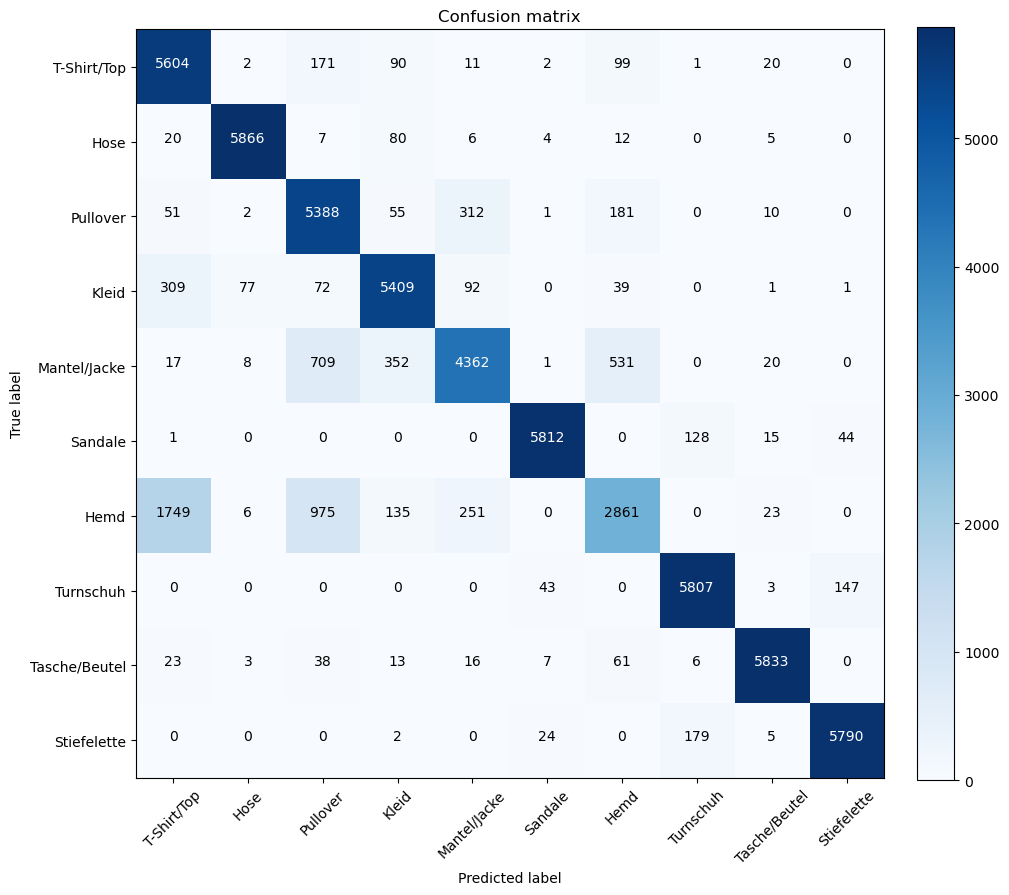

In [109]:
names = ("T-Shirt/Top", "Hose", "Pullover", "Kleid", "Mantel/Jacke", "Sandale", "Hemd", "Turnschuh", "Tasche/Beutel", "Stiefelette")
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, names)

### Speichern und Laden eines trainierten Neuronalen Netzes

Das erlernte "Wissen" eines Neuronalen Netzes befindet sich in den erlernbaren Parametern. Um dieses zu erhalten, und somit das trainierte Neuronale Netz zu persisitieren, können diese Parameter gespeichert und geladen werden. Ein erfolgreich trainiertes Neuronales Netz kann dadurch mittels Modelldefinition und gespeicherter Parameter wiederhergestellt werden, ohne einen neuerlichen Lernprozess erforderlich zu machen.

In [110]:
file_name = "nets/fashionMNIST.pt"

#### Speichern

Die Funktion ___torch.save()___ speichert ein komplettes Modell in eine Datei (zip) unter der Verwendung von Pickle.

In [111]:
torch.save(
    network, # neural network to be saved
    file_name
)

#### Laden
Die Funktion ___torch.load()___ läd ein komplettes mittels ___torch.save()___ gespeichertes Neuronales Netz.

**Anmerkung**: Nach dem Aufruf von ___torch.load()___ sollte die Funktion ___eval()___ des Models aufgerufen werden um ___dropout___ und ___batch normalization___ ___Layer___ für den Inferenzvorgang korrekt zu initialisieren. 

In [112]:
network2 = torch.load(
    file_name,
    weights_only=False
)
network2.eval()

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)